## Project 425 Predicting US Recessions using Machine Learning Algorithms, Cording Part 
#### by Aneri Patel(304642991), Anshika Sharma(305488635), Noriyasu Kaneda(305635354) 

In [440]:
#%cd C:\Users\aneri\Desktop\UCLA\MAE\Econ 425_ Machine Learning 1\Assignments\Project

In [595]:
#import the necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#from util import func_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [596]:
#Load data from 1990 to 2020
df = pd.read_excel("/Users/kanedakaneda/Desktop/425/pj/2021/425data2020.xls", sheet_name='data')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 13 columns):
Date                  372 non-null datetime64[ns]
Recession             372 non-null int64
ConsumerConfidence    372 non-null float64
BusinessConfidence    372 non-null float64
Unemployment          372 non-null float64
IC                    372 non-null int64
WorkHour              372 non-null float64
Production            372 non-null float64
HousingStart          372 non-null int64
CPI                   372 non-null float64
SP500                 372 non-null float64
VIX                   372 non-null float64
US10Y                 372 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 37.9 KB


In [597]:
df.tail()

,Date,Recession,ConsumerConfidence,BusinessConfidence,Unemployment,IC,WorkHour,Production,HousingStart,CPI,SP500,VIX,US10Y
367,2020-08-01,1,98.551025,100.524411,8.4,1032200,41.1,0.016185,1373,0.0035,0.045522,22.89,0.035022
368,2020-09-01,1,98.895809,100.833132,7.8,870250,41.2,-0.000347,1437,0.0025,-0.026700,27.65,0.034286
369,2020-10-01,1,99.069467,101.129400,6.9,784200,41.3,0.014939,1530,0.0012,-0.021696,29.44,0.092857
370,2020-11-01,1,99.043532,101.275030,6.7,740500,41.3,0.010891,1553,0.0018,0.119464,25.00,0.066591
371,2020-12-01,1,99.067049,101.415056,6.7,835500,41.3,0.009321,1680,0.0024,0.036339,22.37,0.093517


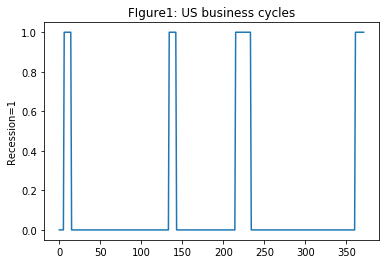

In [598]:
plt.plot(df["Recession"])
plt.title('FIgure1: US business cycles')
plt.ylabel('Recession=1')
plt.show()

<BarContainer object of 2 artists>

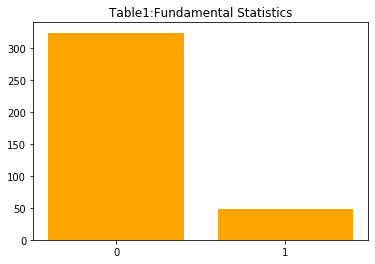

In [599]:
#format data
Date = pd.to_datetime(list(df['Date']))
Recession = list(df['Recession'])
ConsumerConfidence = list(df['ConsumerConfidence'])
BusinessConfidence = list(df['BusinessConfidence'])
Unemployment = list(df['Unemployment'])
IC = list(df['IC'])
WH= list(df['WorkHour'])
Production = list(df['Production'])
HousingStart = list(df['HousingStart'])
SP = list(df['SP500'])
VIX = list(df['VIX'])
US10Y = list(df['US10Y'])
CPI = list(df['CPI'])

# Description for Recession
plt.title('Table1:Fundamental Statistics')
plt.bar(["0","1"], height = [Recession.count(0), Recession.count(1)], color='orange')

In [600]:
# OLS regression to choose variables for logistic regression
X_ols = df.iloc[:,2:14]
Y_ols = df.iloc[:,1]

# add a column for constant term
X_ols = sm.add_constant(X_ols)

# fitting OLS
model = sm.OLS(Y_ols, X_ols)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Recession   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     44.02
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           5.65e-60
Time:                        23:37:28   Log-Likelihood:                 37.255
No. Observations:                 372   AIC:                            -50.51
Df Residuals:                     360   BIC:                            -3.484
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.3914      1

In [601]:
df.v=df.drop(columns=['Recession'])
df.v=df.v.rename(columns={'ConsumerConfidence':'ConsumerCf','BusinessConfidence':'BusinessCf'})
df.v.describe()

,ConsumerCf,BusinessCf,Unemployment,IC,WorkHour,Production,HousingStart,CPI,SP500,VIX,US10Y
count,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,100.078265,99.819405,5.914785,3.862515e+05,41.175000,0.001516,1304.255376,0.001956,0.005247,19.480753,0.002144
std,1.576410,1.136221,1.738426,3.167538e+05,0.633259,0.012683,398.972841,0.002605,0.042792,7.775444,0.140790
min,96.262330,95.598437,3.500000,2.114000e+05,38.500000,-0.172286,478.000000,-0.017900,-0.217377,10.130000,-0.718434
25%,98.940184,99.200789,4.675000,3.051875e+05,40.700000,-0.002500,1055.750000,0.000700,-0.018660,13.930000,-0.071355
50%,100.443552,99.902404,5.500000,3.422000e+05,41.300000,0.001700,1288.500000,0.002000,0.009729,17.545000,-0.006674
75%,101.119332,100.573616,6.825000,3.982500e+05,41.700000,0.006401,1568.500000,0.003200,0.030666,23.215000,0.071268
max,103.060286,102.223694,14.800000,5.040250e+06,42.300000,0.075472,2273.000000,0.013700,0.119464,62.640000,0.591818


In [602]:
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#function [CM, acc, arrR, arrP]=func_confusion_matrix(teY, hatY)
def func_confusion_matrix(y_test, y_pred):

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    unique_values = set(y_pred)
    sorted(unique_values)
    num_classes = len(unique_values)
    unique_values = np.array(list(unique_values)) # change to array so can use indexes
    possible_string_dict = {}
    # make sure all values are 0 based, so can use built-in "zip" function
    if(issubclass(type(y_test[0]), np.integer)): # if values are integers
        y_test_min = y_test.min()
        if(y_test_min != 0):# if does not contain 0, reduce both test and pred by min value to get 0 based for both
            y_test = y_test - y_test_min;
            y_pred = y_pred - y_test_min;
    else:
        # assume values are strings, change to integers
        # TODO, change to convert list from string to int
        y_test_int = np.empty(len(y_test), dtype=int)
        y_pred_int = np.empty(len(y_pred), dtype=int)
        for index in range(0, num_classes):
            current_value = unique_values[index]
            possible_string_dict[index] = current_value
            y_test_int[y_test == current_value] = index
            y_pred_int[y_pred == current_value] = index
        y_test = y_test_int
        y_pred = y_pred_int
       
    ## your code for creating confusion matrix;
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    for a, p in zip(y_test, y_pred):
        conf_matrix[a][p] += 1
 

    ## your code for calcuating acc;
    accuracy = conf_matrix.diagonal().sum() / conf_matrix.sum()
   
    ## your code for calcualting arrR and arrP;
    recall_array = np.empty(num_classes, dtype=float)
    precision_array = np.empty(num_classes, dtype=float)
    for index in range(0, num_classes):
        value = conf_matrix[index,index]
        recall_sum = conf_matrix[index,:].sum()
        precision_sum = conf_matrix[:, index].sum()
        recall_array[index] = value / recall_sum
        precision_array[index] = value / precision_sum
       
    return conf_matrix, accuracy, recall_array, precision_array


def get_confusion_matrix_and_test(y_test, y_pred):
    """ get confusion matrix, accuracy, array of recall and precision
        test confusion matrix and accuracy
    """
    cm, acc, arrR, arrP = func_confusion_matrix(y_test, y_pred)
    expected_matrix = metrics.confusion_matrix(y_test, y_pred)
    assert(np.array_equal(expected_matrix, cm))
    expected_acc = metrics.accuracy_score(y_test, y_pred)
    assert(round(expected_acc, 2) == round(acc, 2))
    return cm, acc, arrR, arrP

    cm, acc, arrR, arrP = get_confusion_matrix_and_test(y_test, y_pred)

In [603]:
# Aggregate the data chosen by the OLS: removed CPI, SP, US10Y
#from sklearn.preprocessing import MinMaxScaler

aggregateList = [ConsumerConfidence, BusinessConfidence, Unemployment, IC, WH, Production, HousingStart,VIX]
aggregateArray = np.array(aggregateList, dtype='float')
X = np.transpose(aggregateArray)
Y = np.array(Recession)


#MinMaxscalre give you all ranges
X= pd.DataFrame(X)
X = MinMaxScaler(feature_range=(0,1)).fit_transform(X) #fits and then transforms the data

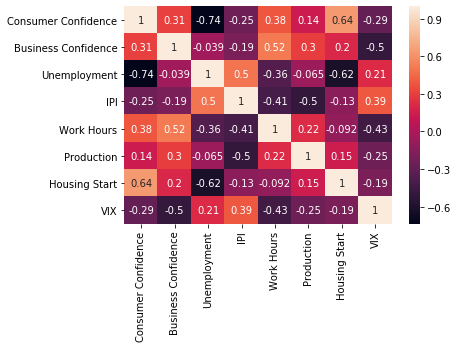

<Figure size 360x648 with 0 Axes>

In [604]:
X2= pd.DataFrame(X,columns = {'Consumer Confidence':ConsumerConfidence, 'Business Confidence':BusinessConfidence, 
                     'Unemployment':Unemployment, 'IPI':IC, 'Work Hours':WH, 'Production':Production, 'Housing Start':HousingStart ,'VIX':VIX})
corrMatrix = X2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.ylim(corrMatrix.shape[0],0)
plt.figure(figsize=(5, 9))
plt.show()

In [605]:
# Aggregate the data chosen by the OLS: removed CPI,SP,Longterm10
aggregateList = [ConsumerConfidence, BusinessConfidence, Unemployment, IC, WH, Production, HousingStart,VIX]
aggregateArray = np.array(aggregateList, dtype='float')
X = np.transpose(aggregateArray)
Y = np.array(Recession)

#MinMaxscalre give you all ranges
X= pd.DataFrame(X)
X = MinMaxScaler(feature_range=(0,1)).fit_transform(X) #fits and then transforms the data

#Split the data to train and test
nMax = 372
nTrain = round(nMax * 2/3)
seed(0)
rand()

trainIndex = np.random.choice(nMax, nTrain, replace=False)
testIndex = np.setdiff1d(range(nMax), trainIndex)

trainX = X[trainIndex]
trainY = Y[trainIndex]
testX = X[testIndex]
testY = Y[testIndex]

### Model 1: Logistic regression 

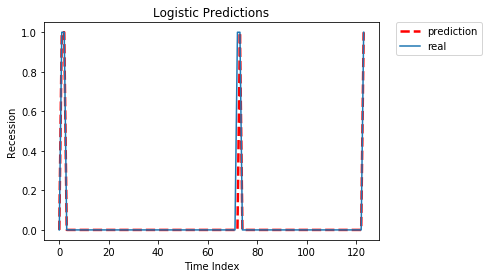

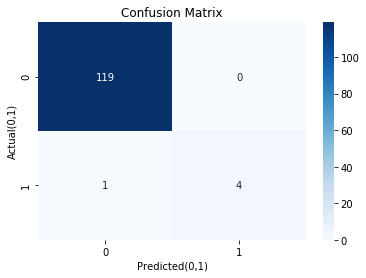

Logistic Regression:

Accuracy: 0.9919354838709677
Recall: [1.  0.8]
Precision: [0.99166667 1.        ]


In [606]:
# Logistic regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(trainX, trainY)
prediction = clf.predict(testX)

plt.title('Logistic Predictions')
plt.plot(prediction, label='prediction',linestyle='dashed',linewidth=2.5,color='red')
plt.plot(testY, label='real')
plt.xlabel('Time Index')
plt.ylabel('Recession')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

# Results
cm, acc, arrR, arrP = func_confusion_matrix(testY, prediction)
sn.heatmap(cm, annot=True, cmap='Blues',fmt="d")
plt.ylim(cm.shape[0],0)
plt.title("Confusion Matrix")
plt.xlabel('Predicted(0,1)')
plt.ylabel('Actual(0,1)')
plt.show()
print('Logistic Regression:\n')
print('Accuracy:', acc)
print('Recall:', arrR)
print('Precision:', arrP)

In [607]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

# Stratified k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)
print('Cross-validation scores: \n{}'.format(cross_val_score(clf, X, Y, cv=stratifiedkfold)))
print('Average score: {}'.format(np.mean(cross_val_score(clf, X, Y, cv=stratifiedkfold))))

Cross-Validation scores: [0.93333333 0.86666667 0.90540541 0.87837838 0.87837838]
Average score: 0.8924324324324324
Cross-validation scores: 
[0.89516129 0.91935484 0.90322581]
Average score: 0.9059139784946236


### Model 2: k Nearest Neighbour (kNN)

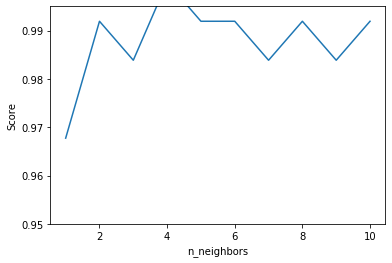

In [608]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []

for k in range(1, 11): # KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(trainX, trainY)
    Y_pred = knc.predict(testX)
    score = knc.score(testX, testY)# R^2
    list_nn.append(k)
    list_score.append(score)

plt.ylim(0.95, 0.995)
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.plot(list_nn, list_score)

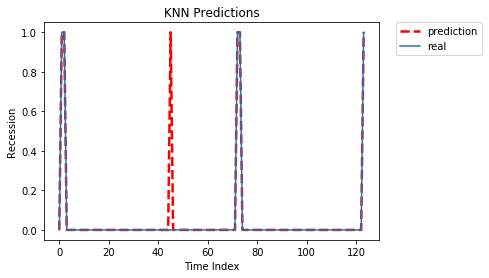

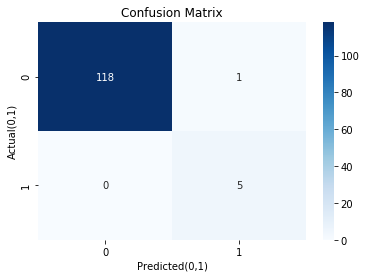

KNN predictions:

Accuracy: 0.9919354838709677
Recall: [0.99159664 1.        ]
Precision: [1.         0.83333333]


In [609]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX, trainY)
knn_pred = knn.predict(testX)

plt.title('KNN Predictions')
plt.plot(knn_pred, label='prediction',linestyle='dashed',linewidth=2.5,color='red')
plt.plot(testY, label='real')
plt.xlabel('Time Index')
plt.ylabel('Recession')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

cm, acc, arrR, arrP = func_confusion_matrix(testY, knn_pred)
sn.heatmap(cm, annot=True, cmap='Blues',fmt="d")
plt.ylim(cm.shape[0],0)
plt.title("Confusion Matrix")
plt.xlabel('Predicted(0,1)')
plt.ylabel('Actual(0,1)')
plt.show()
print('KNN predictions:\n')
print('Accuracy:', acc)
print('Recall:', arrR)
print('Precision:', arrP)

### Model 3: Support vector machines (SVM)

In [610]:
# Best model for SVM
#Using different kernels and parameters to see what optimal value of C is obtained

#linear kernal 
print("Parameter Selection for kernal linear")
for i in range (1,10):
    model = svm.SVC(kernel = 'linear', C = i, gamma= 10) # change kernl type, C, gamma 
    model.fit(X=trainX, y=trainY.ravel())
    error = 1. - model.score(testX, testY) 
    print('c: ',i, 'error: ', error)

#Polynomial kernel  
print("Parameter Selection for Polynomial linear")

for i in range (1,10):
    model = svm.SVC(kernel = 'poly', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=trainX, y=trainY.ravel())
    error = 1. - model.score(testX, testY) 
    print('c: ',i, 'error: ', error)

# RBF kernel 
print("Parameter Selection for RBF linear")
for i in range (1,10):
    model = svm.SVC(kernel = 'rbf', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=trainX, y=trainY.ravel())
    error = 1. -model.score(testX, testY)  
    print('c: ',i, 'error: ', error)

print("The best score is linear kernal with c = 1,2,3,7") 

Parameter Selection for kernal linear
c:  1 error:  0.0
c:  2 error:  0.0
c:  3 error:  0.0
c:  4 error:  0.008064516129032251
c:  5 error:  0.008064516129032251
c:  6 error:  0.008064516129032251
c:  7 error:  0.0
c:  8 error:  0.008064516129032251
c:  9 error:  0.008064516129032251
Parameter Selection for Polynomial linear
c:  1 error:  0.040322580645161255
c:  2 error:  0.040322580645161255
c:  3 error:  0.040322580645161255
c:  4 error:  0.040322580645161255
c:  5 error:  0.040322580645161255
c:  6 error:  0.040322580645161255
c:  7 error:  0.040322580645161255
c:  8 error:  0.040322580645161255
c:  9 error:  0.040322580645161255
Parameter Selection for RBF linear
c:  1 error:  0.040322580645161255
c:  2 error:  0.040322580645161255
c:  3 error:  0.040322580645161255
c:  4 error:  0.040322580645161255
c:  5 error:  0.040322580645161255
c:  6 error:  0.040322580645161255
c:  7 error:  0.040322580645161255
c:  8 error:  0.040322580645161255
c:  9 error:  0.040322580645161255
The best

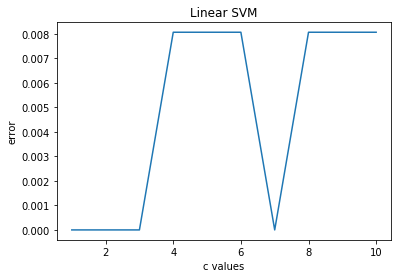

In [611]:
# Support Vector Machine
# Choose the best c_value
c_range = range(1,11)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value, gamma='scale')
    model.fit(X=trainX,y=trainY)
    error= 1. - model.score(testX,testY)
    svm_c_error.append(error)

plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
plt.show()

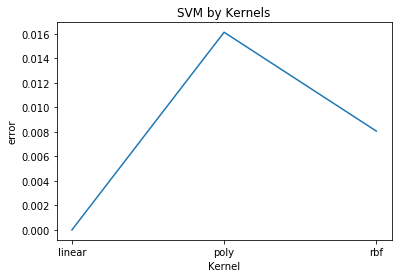

In [612]:
#manually entering c values (4) and kernel type (linear)
best_kernel = 'linear'
best_c = 7
svm_model = svm.SVC(kernel=best_kernel, C=best_c)
svm_model.fit(trainX, trainY)

# Choose the best kernel
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    svm_model = svm.SVC(kernel=kernel_value, C=7, gamma='scale')
    svm_model.fit(X=trainX, y=trainY)
    error = 1. - svm_model.score(testX, testY)
    svm_kernel_error.append(error)
plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()

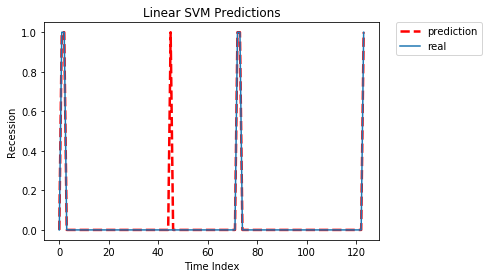

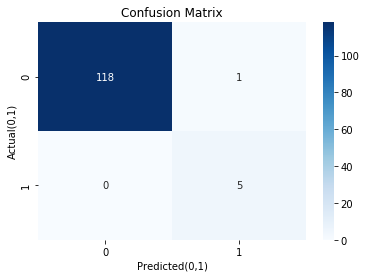

SVM:

Accuracy: 0.9919354838709677
Recall: [0.99159664 1.        ]
Precision: [1.         0.83333333]


In [613]:
# Prediction
svm_pred = svm_model.predict(testX)

plt.title('Linear SVM Predictions')
plt.plot(svm_pred, label='prediction',linestyle='dashed',linewidth=2.5,color='red')
plt.plot(testY, label='real')
plt.xlabel('Time Index')
plt.ylabel('Recession')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

cm, acc, arrR, arrP = func_confusion_matrix(testY, svm_pred)
sn.heatmap(cm, annot=True, cmap='Blues',fmt="d")
plt.ylim(cm.shape[0],0)
plt.title("Confusion Matrix")
plt.xlabel('Predicted(0,1)')
plt.ylabel('Actual(0,1)')
plt.show()
print('SVM:\n')
print('Accuracy:', acc)
print('Recall:', arrR)
print('Precision:', arrP)

### Cross validation 

In [614]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y)
#print('Cross-Validation scores: {}'.format(scores))
print('Average score<KFold=5>: {}'.format(np.mean(scores)))

# Stratified k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)
#print('Cross-validation scores: \n{}'.format(cross_val_score(clf, X, Y, cv=stratifiedkfold)))
print('Average score<KFold=3>: {}'.format(np.mean(cross_val_score(clf, X, Y, cv=stratifiedkfold))))

Average score<KFold=5>: 0.8924324324324324
Average score<KFold=3>: 0.9059139784946236


In [615]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, Y)
#print('Cross-Validation: {}'.format(scores))
print('Average score<KFold=5>: {}'.format(np.mean(scores)))

# Stratified k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)
#print('Cross-validation scores: \n{}'.format(cross_val_score(knn, X, Y, cv=stratifiedkfold)))
print('Average score<KFold=3>: {}'.format(np.mean(cross_val_score(knn, X, Y, cv=stratifiedkfold))))

Average score<KFold=5>: 0.8817297297297296
Average score<KFold=3>: 0.8548387096774194


In [616]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X, Y)
#print('Cross-Validation scores: {}'.format(scores))
print('Average score<KFold=5>: {}'.format(np.mean(scores)))

# Stratified k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)
#print('Cross-validation scores: \n{}'.format(cross_val_score(svm_model, X, Y, cv=stratifiedkfold)))
print('Average score<KFold=3>: {}'.format(np.mean(cross_val_score(svm_model, X, Y, cv=stratifiedkfold))))

Average score<KFold=5>: 0.8276036036036036
Average score<KFold=3>: 0.8387096774193549


In [617]:
print("<Cross-validation score> Logistic:0.892, SVM (with linear kernel, c=7):0.882, kNN:0.828")

<Cross-validation score> Logistic:0.892, SVM (with linear kernel, c=7):0.882, kNN:0.828
